# Branches
## 1. Basic principal
A repository is a linear list of changes (commits) that are done over time. This linear list is called the main branch (former master). Imagine one day you come up with an idea how to solve a problem, but you are not sure if you want to keep it. This "experiment" goes to another branch and can be merged back to the main branch (or any other branch) later. Therefore, branches enable one or more persons to work on parallel ideas/different versions of the same file in parallel. The edit of one branch is independent from the work that is done on another branch. Further, this enables to keep the main branch "clean" - only working code that want to be kept will be merged back to the main branch. 

Working with branches is very efficient and should be part of your everyday work. Instead of copying the repository when a branch is made, Git only stores the reference to a certain commit from which it is branching from.


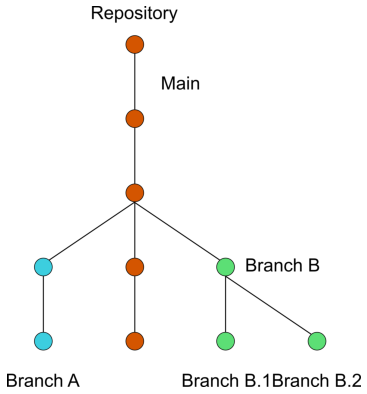

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

PATH = "/home/christina/Figure_QM/"
fig, axs = plt.subplots(1, 1, figsize=(9,7))

# Display image in the first column
img = PILImage.open(PATH + "Branches.png")
arr_img = np.array(img)
axs.imshow(arr_img)
plt.axis('off')
plt.show()

*Figure 1: "Basic idea of a repository tree with a main branch and sub-branches. Every knot is a commit."*

## 2. Github
### 2.1. Create a new branch
1. Select a repository you want to work on.
2. Choose a file in your repository in which you want to make changes.
3. Click on the "Switch branches or tags" button. If you have not done any branches yet it will be set to main as default.
4. Search for a branch name. If it does not exist, github will automatically generate a new branch.
5. Edit the file directly in Github.
6. For committing we have two options: "Commit directly to the branch" or "Create a new branch for this commit and start a pull request"
7. In our case, we commit to the branch that was already generated before, which is the first option.
8. If we check the file in our newly generated branch, we can see the changes we made. It is important that the original file in the main branch was not modified!

### 2.2. Merging branches
Imagine you like the idea you developed in your alternative branch and want to bring it back to the main branch. Therefore, we need to send a pull request to accept the changes from our newly generated branch into the main branch.

1. Press the button "Compare & pull request"
2. Add some information what you have changed and click "Create pull request".
3. Github automatically checks what was changed in the two branches and brings the two branches together. 
4. If there are no conflicts the two branches can be merged by clicking "Merge pull request".
5. Confirm merge

If the main branch and the newly generated branch are modified in parallel github will merge both changes together if there are no conflicts. 


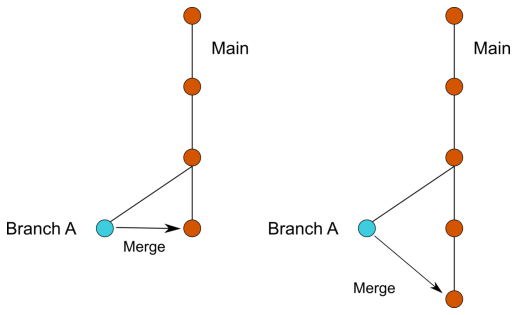

In [11]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

PATH = "/home/christina/Figure_QM/"
fig, axs = plt.subplots(1, 1, figsize=(9,7))

# Display image in the first column
img = PILImage.open(PATH + "Merge.png")
arr_img = np.array(img)
axs.imshow(arr_img)
plt.axis('off')
plt.show()

*Figure 2: Merging Branch A back to the main branch. Left: Changes were only performed in Branch A. Right: Changes were performed in parallel in the Main branch and Branch A.*

# 3. Git
### 3.1. Define branches
By defaul git makes the default branch our main branch. Everytime we commit, the commit will extend the main branch. 

### 3.2. HEAD pointer
The HEAD pointer enables git to know on which branch we are currently working on. HEAD points to a branch and not to a commit and it is called a symbolic pointer. 

### 3.3. Work on branches and delete branches
- git branch <branch name\>: creates a new branch.
- git branch: lists all branches that exist and marks the branch we are working on with an *
- git log --all --decorate --oneline --graph: shows a graph of our branch tree and shows where HEAD is pointing at. (You can store this command as alias: alias graph="<command\>")
- git status: gives information on the branch we are currently working on.
- git checkout <branch name\>: The HEAD pointer will move to the selected branch. Only this branch will be modified in further commits.

### 3.4. Merge branches
When branches are merged, the information of the source branch gets preserved and only the target branch is changed further, by adding the merge with another commit. Note that there are many other merge strategies than the two discussed below. By using the git merge command git will automatically select the best merge strategy for you. 
### 3.4.1. Fast forward
A fast forward merge can only be done, if there is a direct path from one branch to the other in our branch tree. In this case the flag of the branch only needs to be set to the position of the other branch.
- git checkout <target branch\>
- git diff <target branch\>..<source branch\>: shows the changes that will be merged into the current branch
- git merge <source branch\>: merges the target branch with the branch where the changes have been performed (source branch).



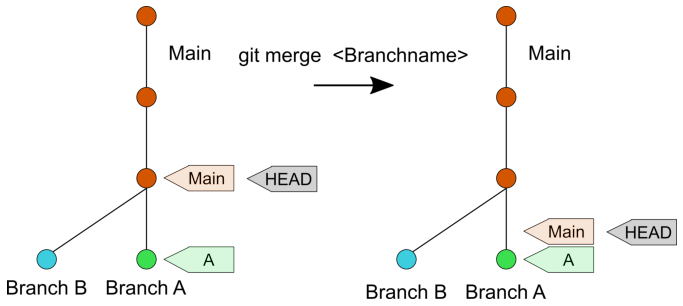

In [16]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

PATH = "/home/christina/Figure_QM/"
fig, axs = plt.subplots(1, 1, figsize=(12,9))

# Display image in the first column
img = PILImage.open(PATH + "Fastmerge.png")
arr_img = np.array(img)
axs.imshow(arr_img)
plt.axis('off')
plt.show()

*Figure 3: Merging changes from Branch A with the Main branch. Left: Situation before merging. Main pointer and Branch A pointer are at two different positions. Right: Situation after merging. Main pointer and Branch A pointer are both together at Branch A.*


### 3.4.2. 3-way
If branches are not connected by a direct path, they cannot be merged via a fast merge.
The commands are exactly the same as for the fast merge, but git automatically realizes that there is no direct connection. Therefore, it makes a new commit and requires entering a commit message.


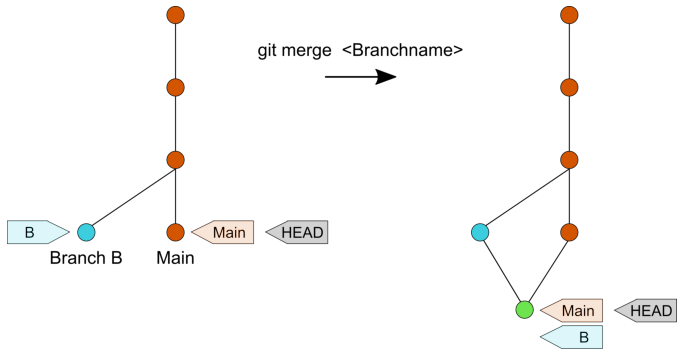

In [14]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

PATH = "/home/christina/Figure_QM/"
fig, axs = plt.subplots(1, 1, figsize=(12,8))

# Display image in the first column
img = PILImage.open(PATH + "merge3.png")
arr_img = np.array(img)
axs.imshow(arr_img)
plt.axis('off')
plt.show()

*Figure 4: Merging changes from Branch B with the Main branch via a 3-way merge. Left: Situation before merging. Main pointer and Branch B pointer are at two different positions. Right: Situation after merging. Main pointer and Branch B pointer are both together at a new commit knot.*

### 3.4.3. Handle conflicts
Merge conflicts occur when we try to merge branches, that have changed the same lines in the same files.
- Change vs. no change: change will win
- Start merging the branches as usual with git merge <branch name\>
- git status: if a conflict occurs, it will tell us that we have unmerged paths

__Solution 1:__
- git merge <branch name\>: start merging process
- git status: check if there are conflicts
- git merge --abort: stops merging process and don't merge anything

__Solution 2:__
- git merge <branch name\>: start merging process, if conflicts occur it will tell
- cat <file name\> shows where the differences in the file are located, conflicts need to be solved manually
- git add <file name\> 
- git status: if all conflicts are solved it will tell that all conflicts are solved, but that the merging process is still ongoing. 
- git commit: Edit commit message if needed.
- exit window with shift+X

__Example of a conflict:__

<<<<<<< HEAD

Yes

=======

No

\>\>\>\>\>\>\> dev


Decide for either Yes or No and delete the rest.


### 3.5. Delete branches
If branches are unused after merging, delete them.
- git branch --merged: The output shows which branches are merged together.
- git branch -d <branch name\>: deletes a branch, but only if they were merged to another branch already
- git branch -D <branch name\>: deletes a branch, no matter if the work was merged already. Be careful! This can delete part of the work you have done!

### 3.6. Rebase
The difference between rebase and merge is that with the rebase command the information of the source branch gets integrated into the target branch, flattening the project history. This makes it easier to check the project history with the git log command. 
- git checkout <source branch\>
- git rebase <target branch\>
- git rebase -i <target branch\>: gives the opportunity to clean up commit history before rebasing
- git push --force: this will force git to push the altered main branch and overwrites the remote main branch 

Always be careful when using the rebase instead of the merge command. Rebase always loses some project history and makes it more difficult to trace changes back! 

__Golden rule of rebasing: Never use the rebase command on public branches!!!__

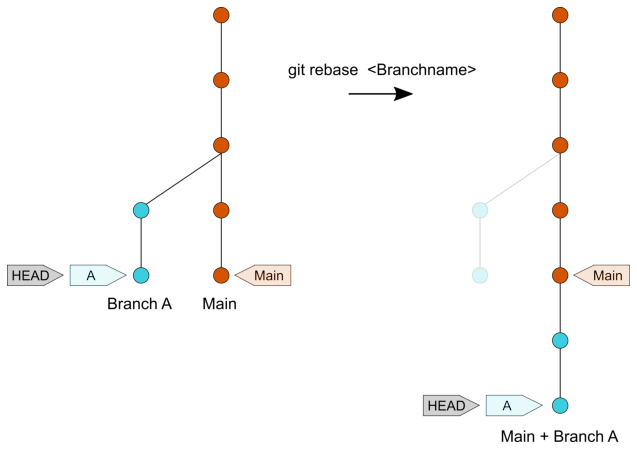

In [15]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import numpy as np

PATH = "/home/christina/Figure_QM/"
fig, axs = plt.subplots(1, 1, figsize=(13,8))

# Display image in the first column
img = PILImage.open(PATH + "rebase.png")
arr_img = np.array(img)
axs.imshow(arr_img)
plt.axis('off')
plt.show()

*Figure 5: Merging the information of Branch A with the Main branch using rebase. Left: Situation before rebase. Right: Situation after rebase. The information of Branch A gets added on the tip of the Main branch.*

### 3.7. Git push vs. git fetch and merge
To get the latest version of a branch from the remote repository to your local repository you need to perform a git pull. This will directly fetch and merge the changes into your local branch.

- git pull <repository name\>: a combination of git fetch and git merge in one command

Alternatively, you can make a more slow, but also more controlled way. This way you first fetch the current status of a remote repository, check the differences between your local branch and the remote branch and than merge the changes into your local branch.

- git fetch <repository name\>
- git diff <local branchname\> <remote branchname \>: check differences between your local and the remote branch
- git merge <remote branchname \>

You might need to check the local and remote branchname with the following commands:

- git branch -r: shows the remote branch names
- git branch: shows the local branch names

After you are done with your work you can push back your changes to the remote repository as we are used to:
- git push <repository name\> <branch name\>

# Useful links and videos
* Git Branches https://www.atlassian.com/git/tutorials/using-branches
* Merging vs. rebase: https://www.atlassian.com/git/tutorials/merging-vs-rebasing
* Fetch and merge: https://longair.net/blog/2009/04/16/git-fetch-and-merge/
* Branches: https://www.youtube.com/watch?v=oPpnCh7InLY
* Branching and merging: https://www.youtube.com/watch?v=FyAAIHHClqI

